In [1]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic.csv") 
df.head(5)
# I have load the CSV File "Titanic.CSV" and read in to Jupyter and requested to present the first 5 rows with all the comlumns. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
# Using the .info function i am checking all columns for any non-null values and checking the date types, at first glance, 7 numerical values
# with 5 object values which will be in the form of a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Age"].fillna(df["Age"].mean(), inplace = True)
df.isnull().sum()
#Now Checking all columns if we have any empty rows within our columns, This highlights we have missing data from Age = "177" missing values 
#Cabin = " 687" missing Values and Embarked = "2" missing values. The age catorgrey having missing values of 177, will represent 20% of the missing 
#data from the total 891 rows. So will need to be replaced with the mean.

C:\Users\mphil\AppData\Local\Temp\ipykernel_11444\2992699785.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace = True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df['Embarked'] =df['Embarked'].fillna("U")

The Embarked column also had 2 missing values, I have now replaced these values with "u" to represent unknown, as the amount missing from the data
 set is minimal and the has catorgorical value should not affect any future plots. As cabin has alot of missing data " 687" values i am going to drop that column entirely 
 from the data set.

In [18]:
df = df.drop(["Cabin","PassengerId",], axis=1)

KeyError: "['Cabin', 'PassengerId'] not found in axis"

In [19]:
df.isnull().sum()
# The Data set now has no missing values so will now begin to explore the data set, for patterns and relationships, i am going to start by plotting,
# the amount of people who lived and died from the ship. 

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

C:\Users\mphil\AppData\Local\Temp\ipykernel_11444\21110792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data = df, palette=['Red','green'])


<Axes: xlabel='Survived', ylabel='count'>

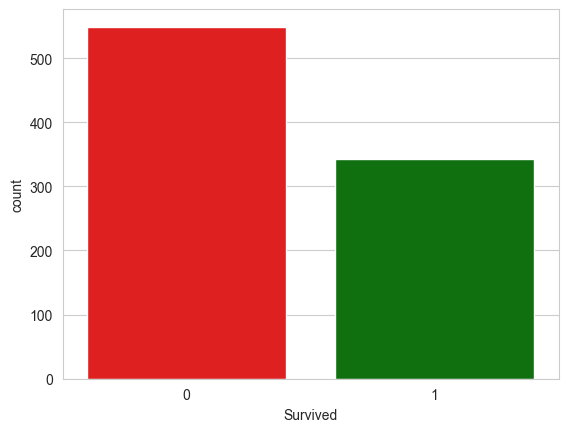

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = df, palette=['Red','green'])
#plt.xticks([0,1],['Dead'],['Survived'])
# The graph below show a visual representation of the distribution of the amount people that died and survied of the,
# 891 passengers that were on board. Represented by red for the 500+ that died and green for the 300+ that survived. 

<Axes: xlabel='Survived', ylabel='count'>

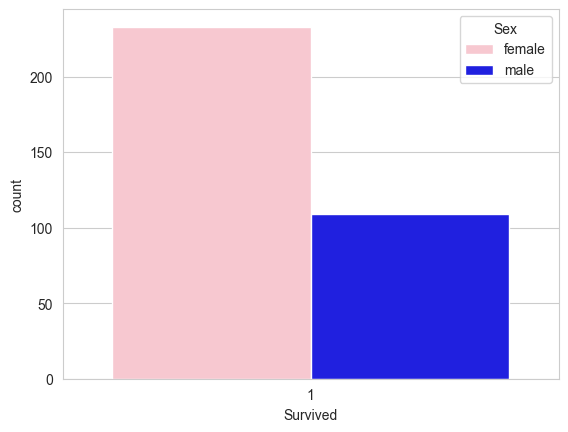

In [21]:
# Next i will plot the genders of the guest on ship that survived.
survived_df = df[df['Survived'] == 1]
sns.countplot(x='Survived',hue='Sex', data=survived_df, palette=['pink','blue'])
#The graph below indicates that More females, survived then males, from this lets see how many
#parent and childern that were on boarded survived.

In [22]:
df['Parch'].unique().sum()

21

C:\Users\mphil\AppData\Local\Temp\ipykernel_11444\335109679.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Survived', 'Survived'])


Text(0, 0.5, 'Count')

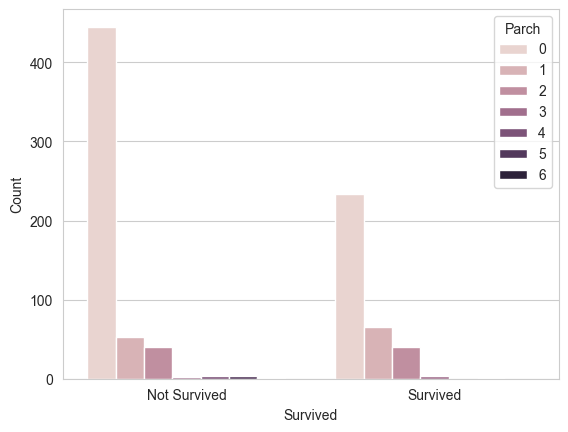

In [23]:
ax = sns.countplot(x='Survived', hue='Parch', data=df)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
# From the data we can identify that individuals with at least more than 3 parent/ children didn't survive and  women and childeren were probably
#not first on the life boats. As you can clear see individuals with no parents or childeren have the highest count of survival rate,
#compared to those who had 1 or 2 childeren. 

C:\Users\mphil\AppData\Local\Temp\ipykernel_11444\1341791336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y = 'Age', data=df, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

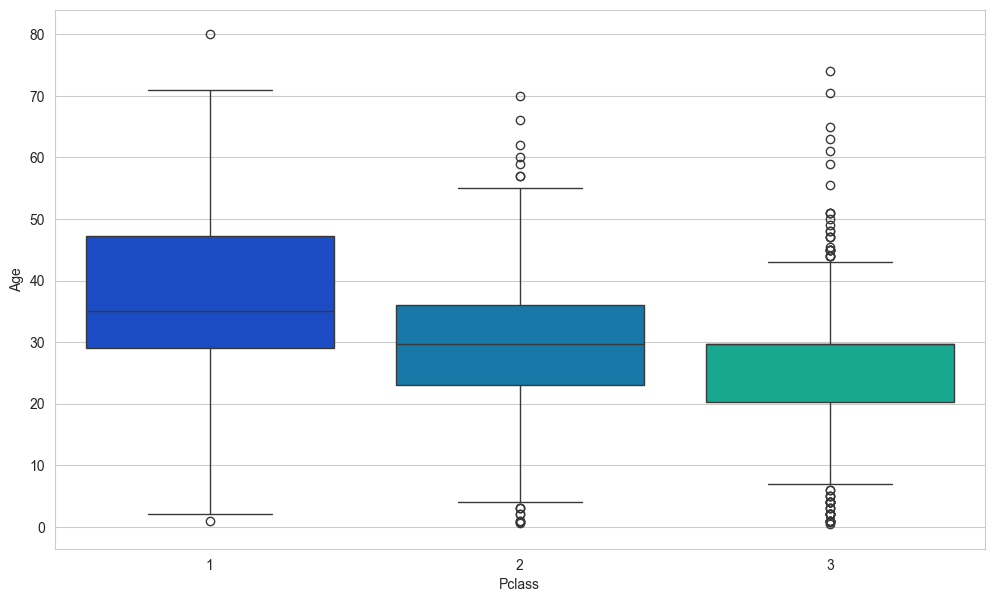

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y = 'Age', data=df, palette='winter')
# The graph below shows age demographic of the individuals in each class, in first clase 50% of individuals,
# are aged between 29 and 47 years old. In second class we have a few outliers however they don't affect the representation 
# that 50% were aged between 23 - 45 With the upper quartile of 25% aged between 45 and 65 and the lower quartile 23 - 4. In 3rd 
# class thier is a few outliers that are affecting the box plot however 50% of them is aged between 20 - 30 years old.

C:\Users\mphil\AppData\Local\Temp\ipykernel_11444\3774466865.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mp.set_xticklabels(['First Class', 'Second Class ','Third Class'])


[Text(0, 0, 'First Class'),
 Text(1, 0, 'Second Class '),
 Text(2, 0, 'Third Class')]

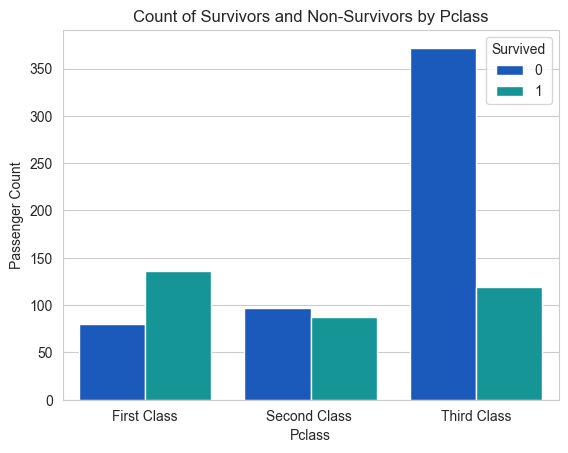

In [25]:
mp = sns.countplot(x='Pclass', hue='Survived', data=df, palette='winter')
mp.set_title("Count of Survivors and Non-Survivors by Pclass")
mp.set_xlabel("Pclass")
mp.set_ylabel("Passenger Count")
mp.set_xticklabels(['First Class', 'Second Class ','Third Class'])
# First observations of the Count plot the 3rd class passengers more than 50% of them died in the accident more than 350 individuals,
# Individuals in second class have a Half of them survived half of them didn't so it was a 50 / 50 split, from this You can assume that 
# Second class passenger's didn't have much influence as compared to the 1st class passengers as more than 50% of individuals survived the 
# accident around 145 out of the 216 1st class passengers. In regards to the question " In the movie, the upper-class passengers were given preference on
# lifeboats. Does this show in the data?" I would say yes the first and Second class had a much better chance of being on a life boat compared to the 1437 
# souls that didn't.

In [26]:
total_pclass_1 = df[df['Pclass'] == 1]['Pclass'].sum()
print("The total number of passengers in 1st class is :",total_pclass_1)

total_pclass_2 = df[df['Pclass'] == 2]['Pclass'].sum()
print("The total number of passengers in 2nd class is :",total_pclass_2)

total_pclass_3 = df[df['Pclass'] == 3]['Pclass'].sum()
print("The total number of passengers in 3rd class is :",total_pclass_3)

The total number of passengers in 1st class is : 216
The total number of passengers in 2nd class is : 368
The total number of passengers in 3rd class is : 1473


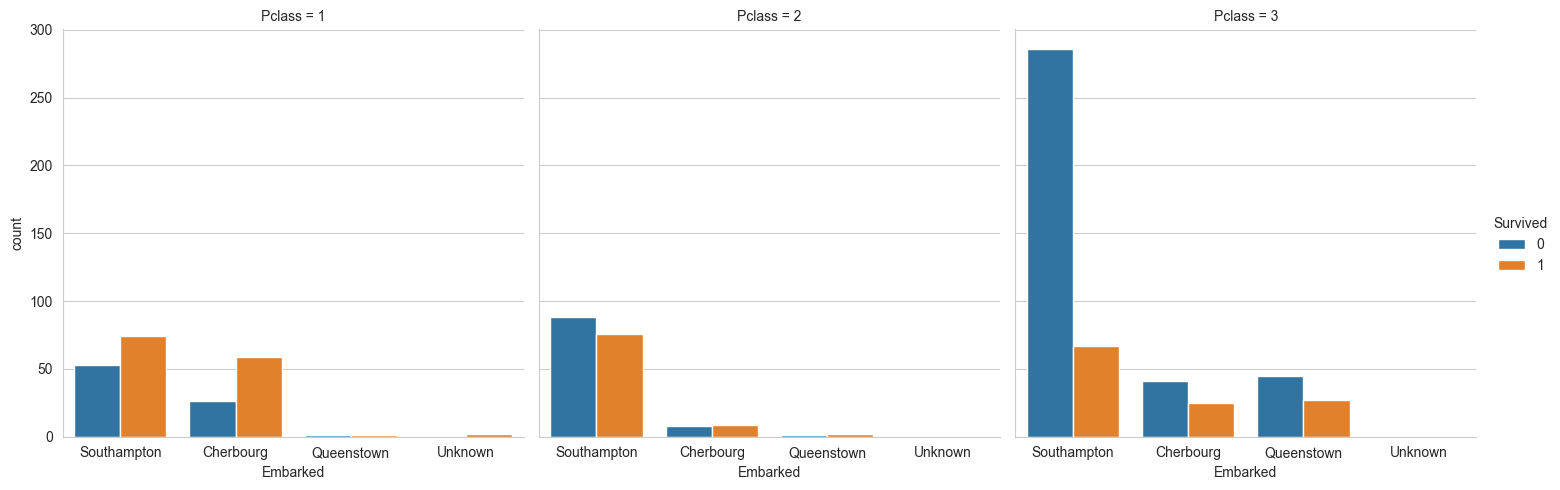

In [28]:
ax = sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = df )
ax.set_xticklabels(['Southampton', 'Cherbourg','Queenstown', 'Unknown'])

In [ ]:
#Lastly i wanted explore the relationship between the classes and area they had embarked on, 
# as the data indicates as to where majority of 3rd and 2nd and 1st class passengers onboarded
# from southhapton. With the Titantic being a british vessel it is to be expected, but also indicates 
# a percentage of more than 50% of the 1st class passsengers no matter if they board on " Southampton","Cherboug", or "Queenstown"
# Seem to have suvived the ordeal of titanic sinking. 

In [ ]:
# In conclusion the most determining factor in determining if you survivded the titantic incident would seem to be your class 
#as their is vast majorityof "1stClass passenger" made it back, however if you was a women thier was also a high percentage that you, would have 
#survived also, it doesn't seem to matter if you had Childeren as the first class passenger's took priority over that. 